In [10]:
# To import our modules
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load in csv for both National and State Datasets into variables
state_df = pd.read_csv("..\Resources\Outpatient_Imaging_Efficiency-State.csv")
national_df = pd.read_csv("..\Resources\Outpatient_Imaging_Efficiency-National.csv")

# State Data Dataframe
state_df.head()

,State,Measure ID,Measure Name,Score,Footnote,Start Date,End Date
0,AK,OP_10,Abdomen CT Use of Contrast Material,5,NaN,07/01/2021,06/30/2022
1,AK,OP_13,Outpatients who got cardiac imaging stress tes...,3.9,NaN,07/01/2021,06/30/2022
2,AK,OP_39,Breast Cancer Screening Recall Rates,7.5,NaN,07/01/2021,06/30/2022
3,AK,OP_8,MRI Lumbar Spine for Low Back Pain,43.2,NaN,07/01/2021,06/30/2022
4,AL,OP_10,Abdomen CT Use of Contrast Material,9,NaN,07/01/2021,06/30/2022


In [4]:
# National Data Dataframe
national_df.head()

,Measure ID,Measure Name,Score,Footnote,Start Date,End Date
0,OP_10,Abdomen CT Use of Contrast Material,6.0,NaN,07/01/2021,06/30/2022
1,OP_13,Outpatients who got cardiac imaging stress tes...,3.8,NaN,07/01/2021,06/30/2022
2,OP_39,Breast Cancer Screening Recall Rates,9.2,NaN,07/01/2021,06/30/2022
3,OP_8,MRI Lumbar Spine for Low Back Pain,37.1,NaN,07/01/2021,06/30/2022


In [5]:
# Merged both State and National Dataframes into a variable called raw_df
raw_df = pd.merge(state_df, national_df, on = "Measure ID")
raw_df.head()

,State,Measure ID,Measure Name_x,Score_x,Footnote_x,Start Date_x,End Date_x,Measure Name_y,Score_y,Footnote_y,Start Date_y,End Date_y
0,AK,OP_10,Abdomen CT Use of Contrast Material,5,NaN,07/01/2021,06/30/2022,Abdomen CT Use of Contrast Material,6.0,NaN,07/01/2021,06/30/2022
1,AL,OP_10,Abdomen CT Use of Contrast Material,9,NaN,07/01/2021,06/30/2022,Abdomen CT Use of Contrast Material,6.0,NaN,07/01/2021,06/30/2022
2,AR,OP_10,Abdomen CT Use of Contrast Material,8.6,NaN,07/01/2021,06/30/2022,Abdomen CT Use of Contrast Material,6.0,NaN,07/01/2021,06/30/2022
3,AS,OP_10,Abdomen CT Use of Contrast Material,Not Available,5.0,07/01/2021,06/30/2022,Abdomen CT Use of Contrast Material,6.0,NaN,07/01/2021,06/30/2022
4,AZ,OP_10,Abdomen CT Use of Contrast Material,5,NaN,07/01/2021,06/30/2022,Abdomen CT Use of Contrast Material,6.0,NaN,07/01/2021,06/30/2022


In [6]:
# Selecting only columns of interests in raw_df
raw_df = raw_df[["State", "Measure ID", "Measure Name_x", "Score_x", "Score_y", "Start Date_x", "End Date_x"]]
raw_df.head()

,State,Measure ID,Measure Name_x,Score_x,Score_y,Start Date_x,End Date_x
0,AK,OP_10,Abdomen CT Use of Contrast Material,5,6.0,07/01/2021,06/30/2022
1,AL,OP_10,Abdomen CT Use of Contrast Material,9,6.0,07/01/2021,06/30/2022
2,AR,OP_10,Abdomen CT Use of Contrast Material,8.6,6.0,07/01/2021,06/30/2022
3,AS,OP_10,Abdomen CT Use of Contrast Material,Not Available,6.0,07/01/2021,06/30/2022
4,AZ,OP_10,Abdomen CT Use of Contrast Material,5,6.0,07/01/2021,06/30/2022


In [7]:
# Renaming columns for easy analysis
raw_df = raw_df.rename(columns={"Measure Name_x": "Measure Name", "Score_x": "State Score", "Score_y": "National Score", "Start Date_x":"Start Date",
                                "End Date_x": "End Date"})
raw_df.head()

,State,Measure ID,Measure Name,State Score,National Score,Start Date,End Date
0,AK,OP_10,Abdomen CT Use of Contrast Material,5,6.0,07/01/2021,06/30/2022
1,AL,OP_10,Abdomen CT Use of Contrast Material,9,6.0,07/01/2021,06/30/2022
2,AR,OP_10,Abdomen CT Use of Contrast Material,8.6,6.0,07/01/2021,06/30/2022
3,AS,OP_10,Abdomen CT Use of Contrast Material,Not Available,6.0,07/01/2021,06/30/2022
4,AZ,OP_10,Abdomen CT Use of Contrast Material,5,6.0,07/01/2021,06/30/2022


In [11]:
# Convert NA State Scores to 0.0 for easy calculations
raw_df["State Score"].loc[raw_df["State Score"]=="Not Available"] = 0.0
raw_df

,State,Measure ID,Measure Name,State Score,National Score,Start Date,End Date
0,AK,OP_10,Abdomen CT Use of Contrast Material,5.0,6.0,07/01/2021,06/30/2022
1,AL,OP_10,Abdomen CT Use of Contrast Material,9.0,6.0,07/01/2021,06/30/2022
2,AR,OP_10,Abdomen CT Use of Contrast Material,8.6,6.0,07/01/2021,06/30/2022
3,AS,OP_10,Abdomen CT Use of Contrast Material,0.0,6.0,07/01/2021,06/30/2022
4,AZ,OP_10,Abdomen CT Use of Contrast Material,5.0,6.0,07/01/2021,06/30/2022
...,...,...,...,...,...,...,...
219,VT,OP_8,MRI Lumbar Spine for Low Back Pain,34.3,37.1,07/01/2021,06/30/2022
220,WA,OP_8,MRI Lumbar Spine for Low Back Pain,36.1,37.1,07/01/2021,06/30/2022
221,WI,OP_8,MRI Lumbar Spine for Low Back Pain,36.9,37.1,07/01/2021,06/30/2022
222,WV,OP_8,MRI Lumbar Spine for Low Back Pain,38.8,37.1,07/01/2021,06/30/2022


In [9]:
# Change State Score datatype from Object to Float
raw_df = raw_df.astype({"State Score":float}, errors='raise')
raw_df.head()


,State,Measure ID,Measure Name,State Score,National Score,Start Date,End Date
0,AK,OP_10,Abdomen CT Use of Contrast Material,5.0,6.0,07/01/2021,06/30/2022
1,AL,OP_10,Abdomen CT Use of Contrast Material,9.0,6.0,07/01/2021,06/30/2022
2,AR,OP_10,Abdomen CT Use of Contrast Material,8.6,6.0,07/01/2021,06/30/2022
3,AS,OP_10,Abdomen CT Use of Contrast Material,0.0,6.0,07/01/2021,06/30/2022
4,AZ,OP_10,Abdomen CT Use of Contrast Material,5.0,6.0,07/01/2021,06/30/2022


In [13]:
# Group raw_df Dataframe by State Column and save it in variable grouped_raw_df
grouped_raw_df = raw_df.groupby('State')

# Calculate mean State Score per state
per_state_mean_df = grouped_raw_df["State Score"].mean()
per_state_mean_df

State
AK    14.900
AL    15.150
AR    14.700
AS     0.000
AZ    13.175
CA    14.375
CO    14.300
CT    17.500
DC    12.550
DE    11.150
FL    14.450
GA    13.500
GU     0.000
HI    11.575
IA    12.175
ID    13.850
IL    14.350
IN    13.475
KS    13.925
KY    12.950
LA    15.400
MA    12.975
MD    13.575
ME    13.375
MI    13.700
MN    13.900
MO    13.725
MP     0.000
MS    14.425
MT    14.925
NC    12.750
ND    12.925
NE    13.175
NH    13.325
NJ    15.725
NM    14.975
NV    13.825
NY    19.075
OH    12.875
OK    14.475
OR    14.675
PA    13.200
PR    28.225
RI    13.575
SC    13.375
SD    12.300
TN    13.000
TX    14.925
UT    14.800
VA    12.675
VI     0.000
VT    12.250
WA    13.025
WI    13.075
WV    14.425
WY    14.950
Name: State Score, dtype: float64

In [14]:
# Calcualte mean of National Score 
national_mean_df = grouped_raw_df["National Score"].mean()
national_mean_df

State
AK    14.025
AL    14.025
AR    14.025
AS    14.025
AZ    14.025
CA    14.025
CO    14.025
CT    14.025
DC    14.025
DE    14.025
FL    14.025
GA    14.025
GU    14.025
HI    14.025
IA    14.025
ID    14.025
IL    14.025
IN    14.025
KS    14.025
KY    14.025
LA    14.025
MA    14.025
MD    14.025
ME    14.025
MI    14.025
MN    14.025
MO    14.025
MP    14.025
MS    14.025
MT    14.025
NC    14.025
ND    14.025
NE    14.025
NH    14.025
NJ    14.025
NM    14.025
NV    14.025
NY    14.025
OH    14.025
OK    14.025
OR    14.025
PA    14.025
PR    14.025
RI    14.025
SC    14.025
SD    14.025
TN    14.025
TX    14.025
UT    14.025
VA    14.025
VI    14.025
VT    14.025
WA    14.025
WI    14.025
WV    14.025
WY    14.025
Name: National Score, dtype: float64

In [15]:
# Create Dataframe called 'final_df' with columns for the calculated mean State Score per state and mean of National Score 
final_df =  pd.DataFrame({"Average State Score": per_state_mean_df, "Average National Score": national_mean_df})
final_df

,Average State Score,Average National Score
State,,
AK,14.900,14.025
AL,15.150,14.025
AR,14.700,14.025
AS,0.000,14.025
AZ,13.175,14.025
CA,14.375,14.025
CO,14.300,14.025
CT,17.500,14.025
DC,12.550,14.025


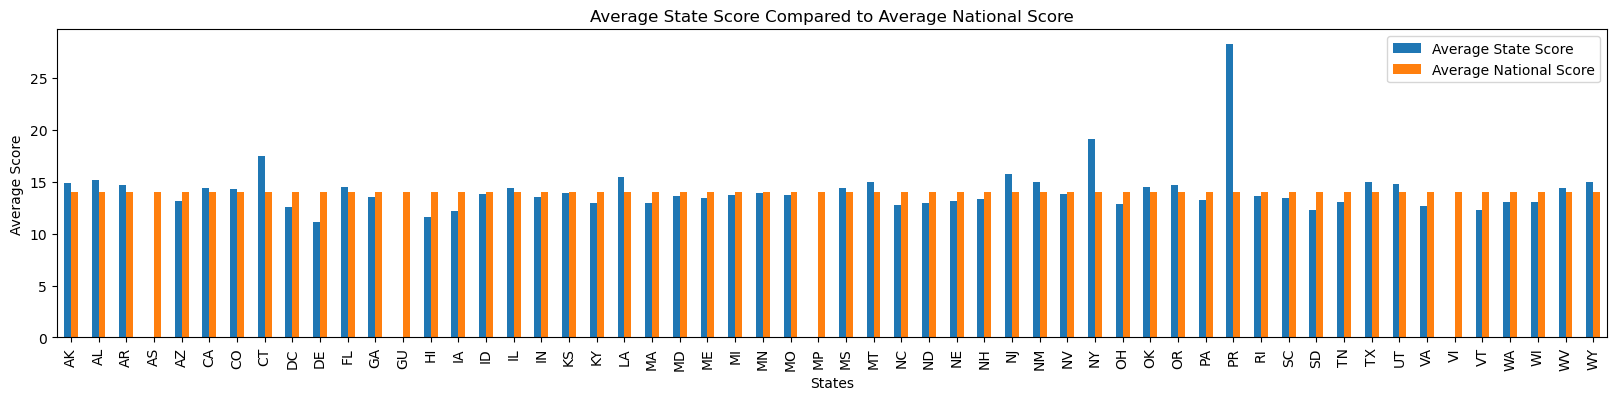

In [16]:
# Bar Chart visualizing Average Score for each State compared to the Average National Score

final_df_plot = final_df.plot(kind="bar", figsize=(20,4), ylabel="Average Score", xlabel="States")
plt.title("Average State Score Compared to Average National Score")
plt.show()

In [17]:
# Creating Dataframe for Inefficient States (States above National Average)
inefficient_df =  final_df.loc[(final_df["Average State Score"] > final_df["Average National Score"]) & (final_df["Average State Score"]!=0.0)]
inefficient_df["Verdict"] = "Inefficient"
inefficient_df

,Average State Score,Average National Score,Verdict
State,,,
AK,14.900,14.025,Inefficient
AL,15.150,14.025,Inefficient
AR,14.700,14.025,Inefficient
CA,14.375,14.025,Inefficient
CO,14.300,14.025,Inefficient
CT,17.500,14.025,Inefficient
FL,14.450,14.025,Inefficient
IL,14.350,14.025,Inefficient
LA,15.400,14.025,Inefficient


In [18]:
# Creating Dataframe for Efficient States (States below National Average)
efficient_df =  final_df.loc[(final_df["Average State Score"] <= final_df["Average National Score"]) & (final_df["Average State Score"]!=0.0)]
efficient_df["Verdict"] = "Efficient"
efficient_df

,Average State Score,Average National Score,Verdict
State,,,
AZ,13.175,14.025,Efficient
DC,12.550,14.025,Efficient
DE,11.150,14.025,Efficient
GA,13.500,14.025,Efficient
HI,11.575,14.025,Efficient
IA,12.175,14.025,Efficient
ID,13.850,14.025,Efficient
IN,13.475,14.025,Efficient
KS,13.925,14.025,Efficient


In [19]:
# Creating Dataframe for States with zero average due to no data
zero_average_states = final_df.loc[final_df["Average State Score"]==0.0]
zero_average_states["Verdict"] = "Not Available"
zero_average_states

,Average State Score,Average National Score,Verdict
State,,,
AS,0.0,14.025,Not Available
GU,0.0,14.025,Not Available
MP,0.0,14.025,Not Available
VI,0.0,14.025,Not Available


In [20]:
# Creating Dataframe that concatinates efficient_df, inefficient_df, and zero_average_states Dataframes
verdict_df = pd.concat([efficient_df, inefficient_df, zero_average_states])
verdict_df

,Average State Score,Average National Score,Verdict
State,,,
AZ,13.175,14.025,Efficient
DC,12.550,14.025,Efficient
DE,11.150,14.025,Efficient
GA,13.500,14.025,Efficient
HI,11.575,14.025,Efficient
IA,12.175,14.025,Efficient
ID,13.850,14.025,Efficient
IN,13.475,14.025,Efficient
KS,13.925,14.025,Efficient


In [21]:
# Sort new Dataframe by State in ascending order
verdict_df = verdict_df.sort_values(by="State", ascending=True)
verdict_df

,Average State Score,Average National Score,Verdict
State,,,
AK,14.900,14.025,Inefficient
AL,15.150,14.025,Inefficient
AR,14.700,14.025,Inefficient
AS,0.000,14.025,Not Available
AZ,13.175,14.025,Efficient
CA,14.375,14.025,Inefficient
CO,14.300,14.025,Inefficient
CT,17.500,14.025,Inefficient
DC,12.550,14.025,Efficient


In [22]:
# Sort new Dataframe by Average State Score in ascending order
most_efficient = verdict_df.sort_values(by="Average State Score", ascending=True)

# Remove States without Data
most_efficient = most_efficient.loc[most_efficient["Average State Score"]>0.0]
most_efficient

,Average State Score,Average National Score,Verdict
State,,,
DE,11.150,14.025,Efficient
HI,11.575,14.025,Efficient
IA,12.175,14.025,Efficient
VT,12.250,14.025,Efficient
SD,12.300,14.025,Efficient
DC,12.550,14.025,Efficient
VA,12.675,14.025,Efficient
NC,12.750,14.025,Efficient
OH,12.875,14.025,Efficient


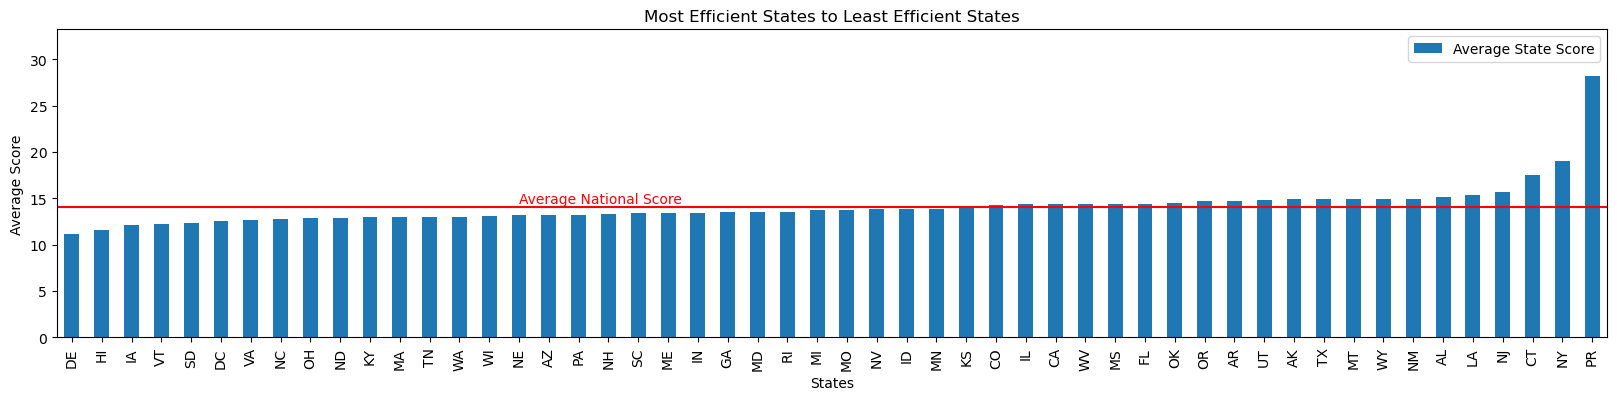

In [23]:
# Plot BarChart showing the most efficient state to least efficent states (left to right)
most_efficient_plot = most_efficient["Average State Score"].plot(kind="bar", figsize=(20,4), ylabel="Average Score", xlabel="States")
plt.hlines(y=14.025, xmin=-1, xmax=51.5, colors="red")
plt.text(15, 14.5, "Average National Score", color="red")
plt.legend(loc="best")
plt.title("Most Efficient States to Least Efficient States")
plt.ylim(0, max(most_efficient["Average State Score"]+5))
plt.show()


In [25]:
# Convert verdict_df to csv and save in Output folder 
verdict_df.to_csv("../Outputs/Outpatient_State_Imaging_Efficiency.csv")